In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 

In [3]:
X.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [4]:
X = X.drop("dteday", axis=1)
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


In [5]:
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


In [6]:
y = np.ravel(y)

In [7]:
from sklearn.neural_network import MLPRegressor

In [8]:
#capa de entrada: 12 neuronas
#primer capa oculta: 15 neuronas
#segunda capa oculta: 5 neuronas
#capa de salida: 1 neurona
modelo = MLPRegressor(hidden_layer_sizes=(15, 5), max_iter=1500)

In [9]:
12*15+15

195

In [10]:
15*5+5

80

In [11]:
5+1

6

In [12]:
12*15+15 + 15*5+5 + 5+1

281

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.2, random_state=42)
y_train, y_test = train_test_split(y, test_size = 0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13903, 12), (3476, 12), (13903,), (3476,))

In [14]:
modelo.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(15, 5), max_iter=1500)

In [15]:
y_pred = modelo.predict(X_test)

In [16]:
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
nrmse = (rmse / (y_train.max() - y_train.min())) * 100
print("Test NRMSE:", round(nrmse, 3), '%')

Test NRMSE: 10.195 %


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [40]:
modelo = MLPRegressor(
    hidden_layer_sizes = (10, 5),
    max_iter = 2000,
    activation = 'logistic',
    solver = 'adam',
    learning_rate_init = 0.005,
    momentum = 0.75,
    batch_size = 15
)

In [41]:
modelo.fit(X_train_scaled, y_train)

MLPRegressor(activation='logistic', batch_size=15, hidden_layer_sizes=(10, 5),
             learning_rate_init=0.005, max_iter=2000, momentum=0.75)

In [42]:
y_pred = modelo.predict(X_test_scaled)

In [43]:
rmse = np.sqrt(np.mean(np.square(y_test - y_pred)))
nrmse = (rmse / (y_train.max() - y_train.min())) * 100
print("Test NRMSE:", round(nrmse, 3), '%')

Test NRMSE: 5.667 %


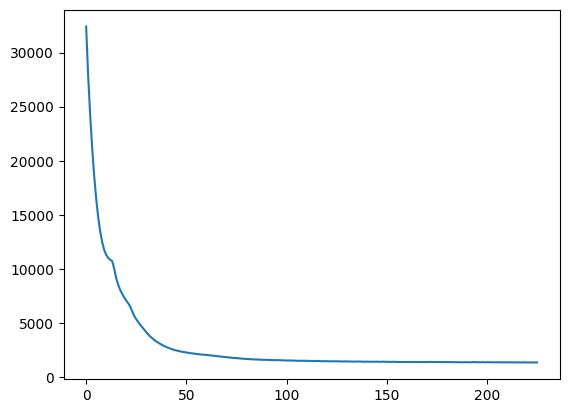

In [44]:
plt.plot(modelo.loss_curve_)
plt.show()

In [45]:
modelo.loss_curve_[-1]

np.float64(1352.478417933951)

In [46]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(modelo, open(filename, 'wb'))